Corinne Orton 7-21<br><br>
A file to create embeddings using any transform in transforms.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from transforms import *
from transforms import get_embedding


### Load data ###

#### CAFs ####

In [2]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
expr = pd.read_csv(path + 'data/CAFs.txt', sep='\t')
print(expr.iloc[0:4,0:4])
X_train = expr.values[:,0:(expr.shape[1]-1)]
X_train = np.log(X_train + 1)
n = X_train.shape[0]
print("\nThis data set contains " + str(n) + " samples")
y_train = expr.values[:,expr.shape[1]-1]
print("\nDimensions of the  data set: ")
print(X_train.shape, y_train.shape)

                1110020A21Rik  1110046J04Rik  1190002F15Rik  1500015A07Rik
SS2_15_0048_A3            0.0            0.0            0.0            0.0
SS2_15_0048_A6            0.0            0.0            0.0            0.0
SS2_15_0048_A5            0.0            0.0            0.0            0.0
SS2_15_0048_A4            0.0            0.0            0.0            0.0

This data set contains 716 samples

Dimensions of the  data set: 
(716, 557) (716,)


#### FMNIST ####

In [10]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
source_df = pd.read_csv("data/" + "fashion-mnist.csv")
X_train = source_df.iloc[:,:].values.astype(np.float32)
y_train = source_df["class"].values 

#### Kazer #### 
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.

In [2]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "hiv_70.npy")
y_train = np.load("data/"+ "hiv_label.npy", allow_pickle=True)

#### Convert text labels to ints ####

In [4]:
# code to save labels
labels = []
for i in range(len(y_train)):
    current = y_train[i]
    if current not in labels:
        print(current)
        labels.append(current)


B cell
T cell
plasmablast
NK cell
DCs
monocyte
CTLs


In [6]:
# create map
map = {}
for i in range(len(labels)):
    map[labels[i]] = i
print(map)

{'B cell': 0, 'T cell': 1, 'plasmablast': 2, 'NK cell': 3, 'DCs': 4, 'monocyte': 5, 'CTLs': 6}


In [8]:
y_train = [map[val] for val in y_train]

In [9]:
np.save(path+"data/"+ "hiv_label.npy",y_train)

### Embed ###

In [30]:
y = get_embedding(X_train, "umap")

### Plot ###

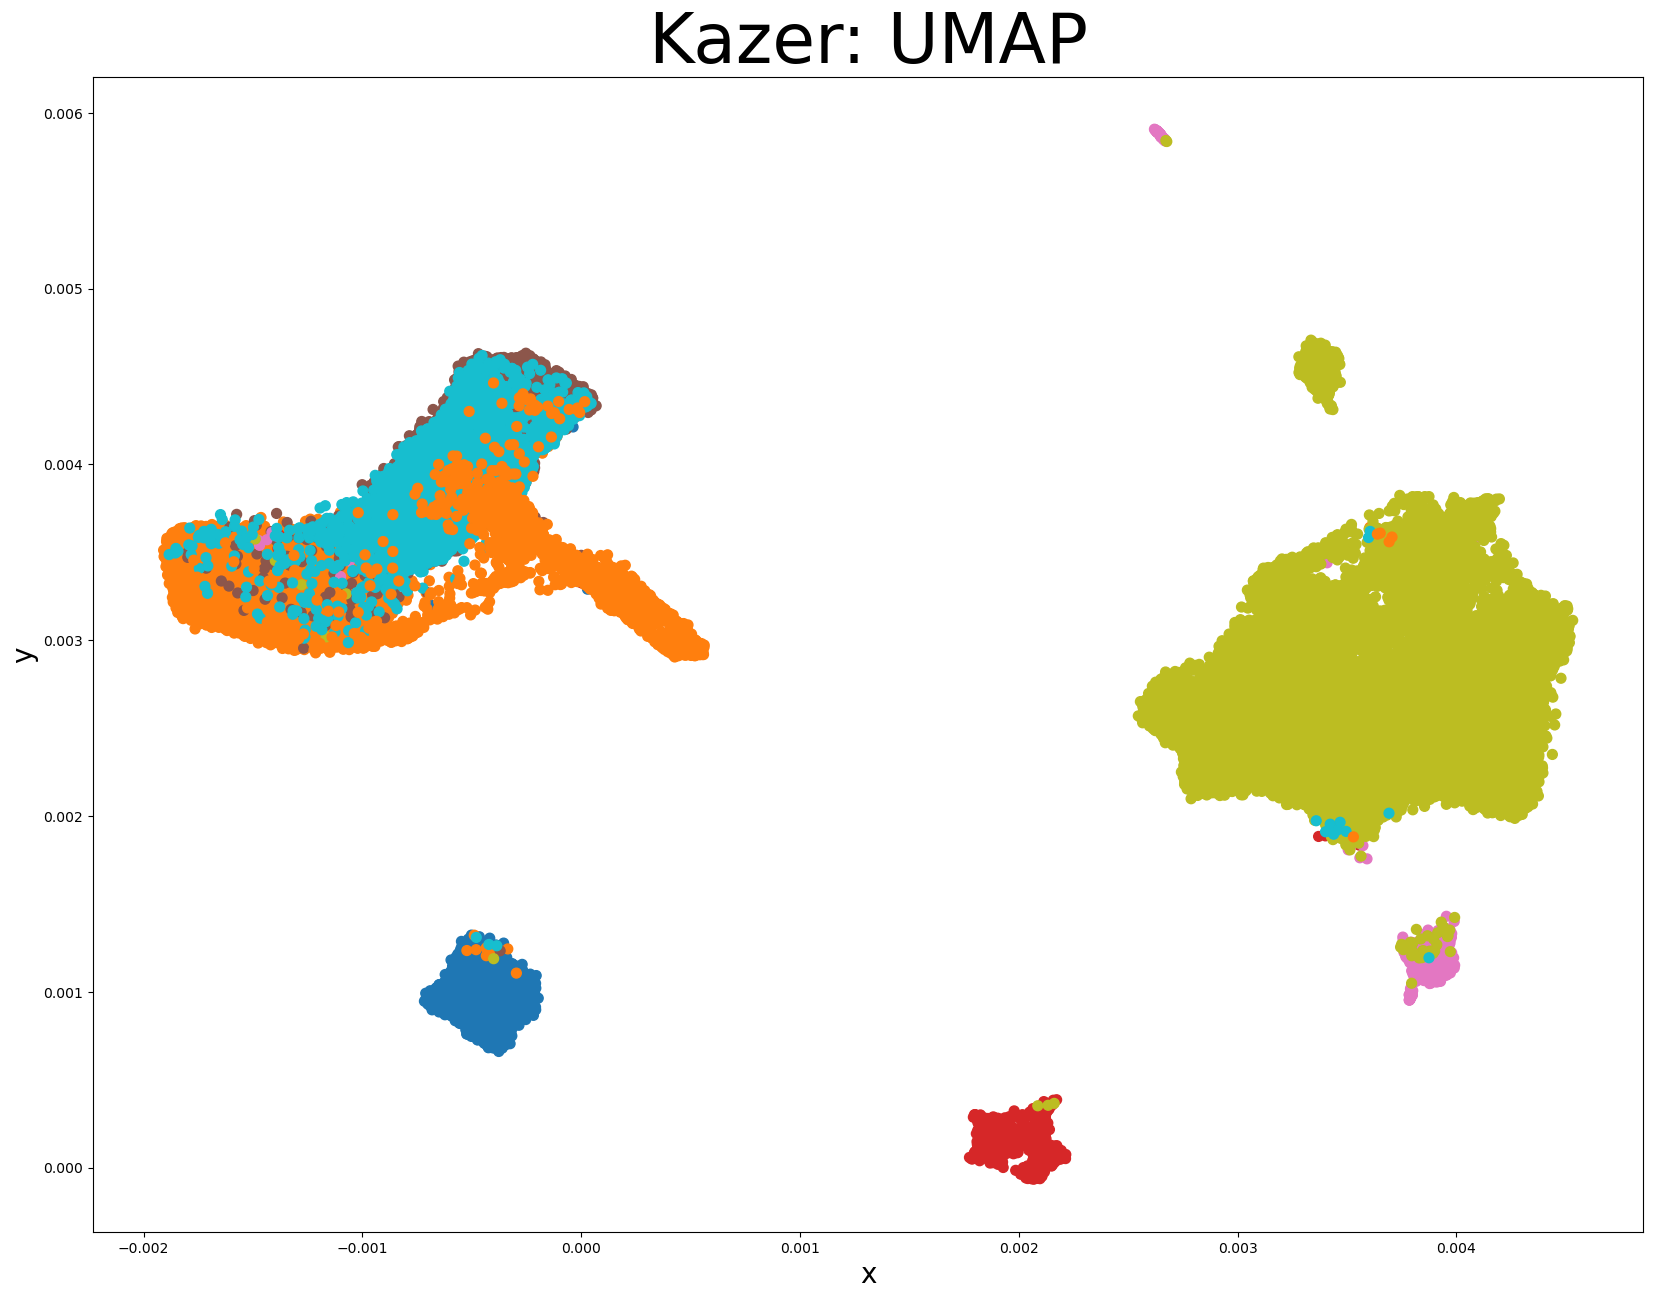

In [31]:
plt.figure(figsize=(20,15))
#colors = ['#0517b3','#b16ce6','#03934a','#36b4f7','#980503'] # cell mix
#colors = ['#17329f','#98034c','#03934a','#6ebac3'] # CAFs
#mapped_colors = [colors[int(value-1)] for value in y_train]
#plt.scatter(y[:,0], y[:,1], s = 50, c=mapped_colors)
plt.scatter(y[:,0], y[:,1], s = 50, c=y_train, cmap='tab10') # RNA
# tSNE_PCA: \u03B1 = 0.75
plt.title("Kazer: UMAP", fontsize = 50)
plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
plt.show()

### Save file ###

In [14]:
emb_path = path + 'embeddings/'

In [32]:
np.save(emb_path + 'Kazer_umap.npy', y)